# sLDSC analysis
- 1: QQ-plot
- 2: sLDSC analysis

In [34]:
library(ggplot2)
library(dplyr)
library(data.table)
library(tidyr)
library(RColorBrewer)
library(wesanderson)

In [1]:
setwd("~/project-gandalm/isoform_twas/sLDSC/")

## 1: QQ-plot

In [3]:
gwa <- fread("/u/project/gandalm/shared/GWAS/SCZ.Pardinas.PGC.2018/CLOZUK_rsFiltered_SNP_P.txt", data.table = F)

In [4]:
dim(gwa)
head(gwa)

[1] 8167163       2

,SNP,P
,<chr>,<dbl>
1,rs10000000,0.9394
2,rs1000000,0.0954
3,rs10000003,0.9528
4,rs10000005,0.2889
5,rs10000006,0.2149
6,rs10000008,0.1561


In [10]:
# observed <- sort(gwa$P)
# lobs <- -(log10(observed))
# expected <- c(1:length(observed))
# lexp <- -(log10(expected / (length(expected)+1)))

In [11]:
# pdf("figures/qqplot.pdf", width=6, height=6)
# plot(c(0,7), c(0,7), col="red", lwd=3, type="l", 
#      xlab="Expected (-logP)", ylab="Observed (-logP)", 
#      xlim=c(0,7), ylim=c(0,7), las=1, xaxs="i", yaxs="i", bty="l")
# points(lexp, lobs, pch=23, cex=.4, bg="black") 
# dev.off()

png 
  2

In [5]:
eqtl_set <- read.table("data/mixed_top_eqtl.txt", header = F, stringsAsFactors = F)
isoqtl_set <- read.table("data/mixed_top_isoqtl_grp_perm.txt", header = F, stringsAsFactors = F)
sqtl_set <- read.table("data/mixed_top_sqtl_grp_perm.txt", header = F, stringsAsFactors = F)

In [6]:
dim(eqtl_set)
dim(isoqtl_set)
dim(sqtl_set)

[1] 9702    1

[1] 11388     1

[1] 6495    1

In [7]:
head(eqtl_set)

,V1
,<chr>
1,rs192563417
2,rs17529513
3,rs4896658
4,rs760969
5,rs497071
6,rs34269469


In [8]:
eqtl_set <- eqtl_set %>% inner_join(gwa, by = c("V1"="SNP"))
head(eqtl_set)
dim(eqtl_set)

,V1,P
,<chr>,<dbl>
1,rs192563417,0.3658000
2,rs17529513,0.4637000
3,rs760969,0.0251000
4,rs497071,0.0611000
5,rs34269469,0.0006905
6,rs13233496,0.0240000


[1] 6376    2

In [9]:
isoqtl_set <- isoqtl_set %>% inner_join(gwa, by = c("V1"="SNP"))
dim(isoqtl_set)
sqtl_set <- sqtl_set %>% inner_join(gwa, by = c("V1"="SNP"))
dim(sqtl_set)

[1] 7542    2

[1] 4297    2

In [10]:
eqtl_qq <- data.frame("lobs" = -(log10(sort(eqtl_set$P))), 
                      "lexp" = -(log10( c(1:nrow(eqtl_set)) / (nrow(eqtl_set)+1) )),
                      "group" = "cis-eQTL")

In [11]:
isoqtl_qq <- data.frame("lobs" = -(log10(sort(isoqtl_set$P))), 
                      "lexp" = -(log10( c(1:nrow(isoqtl_set)) / (nrow(isoqtl_set)+1) )),
                      "group" = "cis-isoQTL")
sqtl_qq <- data.frame("lobs" = -(log10(sort(sqtl_set$P))), 
                      "lexp" = -(log10( c(1:nrow(sqtl_set)) / (nrow(sqtl_set)+1) )),
                      "group" = "cis-sQTL")

In [12]:
# gwas
observed <- sort(gwa$P)
lobs <- -(log10(observed))
expected <- c(1:length(observed))
lexp <- -(log10(expected / (length(expected)+1)))
gwas_qq <- data.frame("lobs" = lobs, "lexp" = lexp, "group" = "SCZ GWAS")

In [13]:
qq_df <- rbind(eqtl_qq, isoqtl_qq, sqtl_qq, gwas_qq)

In [14]:
colors <- c("cis-eQTL" = "steelblue1", "cis-isoQTL" = "darkorchid1", "cis-sQTL" = "springgreen3", "SCZ GWAS" = "grey")

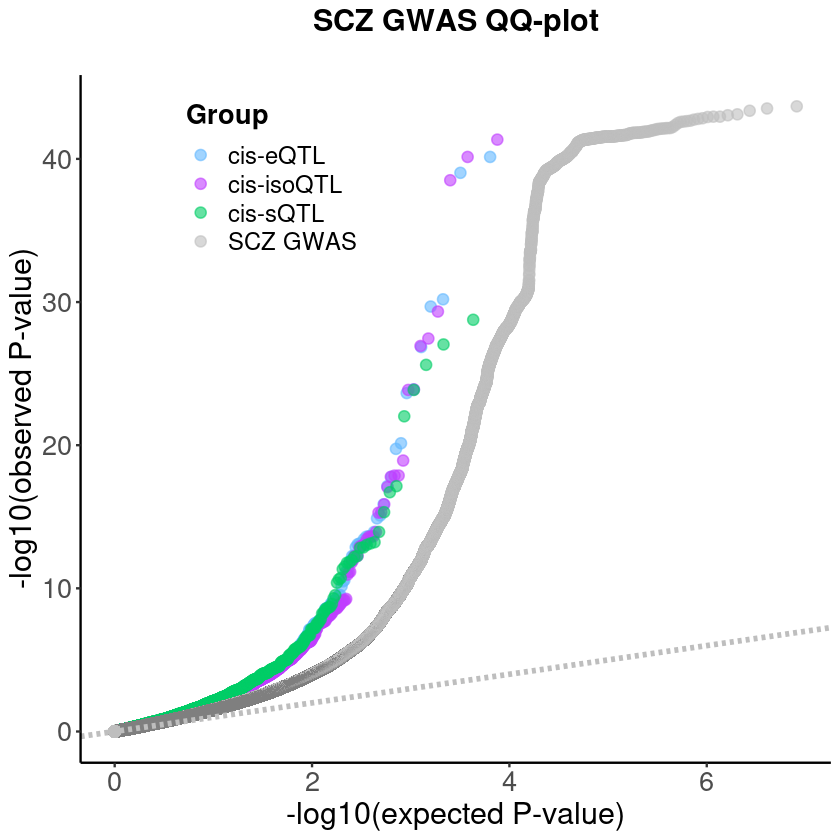

In [15]:
p <- ggplot(qq_df, aes(color = group, x = lexp, y = lobs)) +
    geom_point(size = 2.5, alpha = .6) +
    geom_abline(slope = 1, intercept = 0, linetype = "dashed", size = 1.2, color = "grey") +
    scale_color_manual(name = "Group", values = colors) +
    ggtitle("SCZ GWAS QQ-plot", subtitle = "") +
    xlab("-log10(expected P-value)") +
    ylab("-log10(observed P-value)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
          legend.position = c(0.25, 0.85),
          legend.title = element_text(size = 16, face = "bold"),
          legend.text = element_text(size = 14))
p

In [ ]:
ggsave("figures/qqplot.png", p, width = 6, height = 6)

### Quick and dirty: plot eQTL, isoQTL, sQTL together, with the same statistics for BG annotations, which are slightly different between QTL sets (univariate model)

In [6]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_0bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

In [7]:
isoqtl <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_grp_perm_0bp.results", header = T, stringsAsFactors = F)
isoqtl$Enrichment_p_fdr <- p.adjust(isoqtl$Enrichment_p, "fdr")
isoqtl[isoqtl$Category=="L2_1",1] <- "isoQTL"
isoqtl <- isoqtl %>% filter(Category == "isoQTL")
sqtl <- read.table("results/SCZ.Clozuk.2018_mixed_top_sqtl_grp_perm_0bp.results", header = T, stringsAsFactors = F)
sqtl$Enrichment_p_fdr <- p.adjust(sqtl$Enrichment_p, "fdr")
sqtl[sqtl$Category=="L2_1",1] <- "sQTL"
sqtl <- sqtl %>% filter(Category == "sQTL")
subset_dat <- rbind(subset_dat, isoqtl, sqtl)

In [8]:
# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

In [9]:
subset_dat$group <- "Baseline"
for(i in 1:nrow(subset_dat)) {
    if(subset_dat[i,'Category'] == "eQTL") {
        subset_dat[i,'group'] <- "eQTL"
    }
    if(subset_dat[i,'Category'] == "isoQTL") {
        subset_dat[i,'group'] <- "isoQTL"
    }
    if(subset_dat[i,'Category'] == "sQTL") {
        subset_dat[i,'group'] <- "sQTL"
    }
}
# subset_dat$color_cat <- factor(subset_dat$color_cat, levels = c("Baseline", "eQTL", "isoQTL", "sQTL"))

In [7]:
# display <- c("sQTL", "isoQTL", "eQTL", rep("", 14))

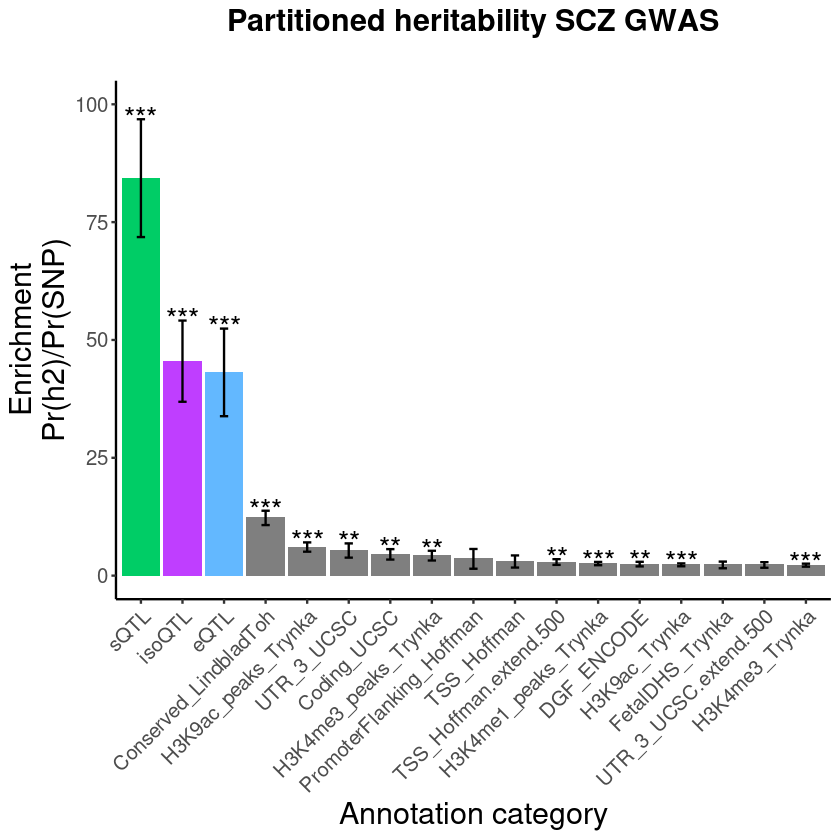

In [10]:
p <- ggplot(subset_dat, aes(x = reorder(Category,-Enrichment), 
                            y = Enrichment)) +
  geom_bar(stat = "identity", width = .9, aes(fill = group)) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), 
                    ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50", "steelblue1", "darkorchid1", "springgreen3")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12),
        axis.text.y = element_text(size=12),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,100) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6) 
#   scale_x_discrete(labels = display)
            
p

In [11]:
ggsave("figures/SCZ.Clozuk.2018_mixed_top_e_iso_s_qtl_0bp_window.png", p, height=6, width=10)

### All susie eQTL

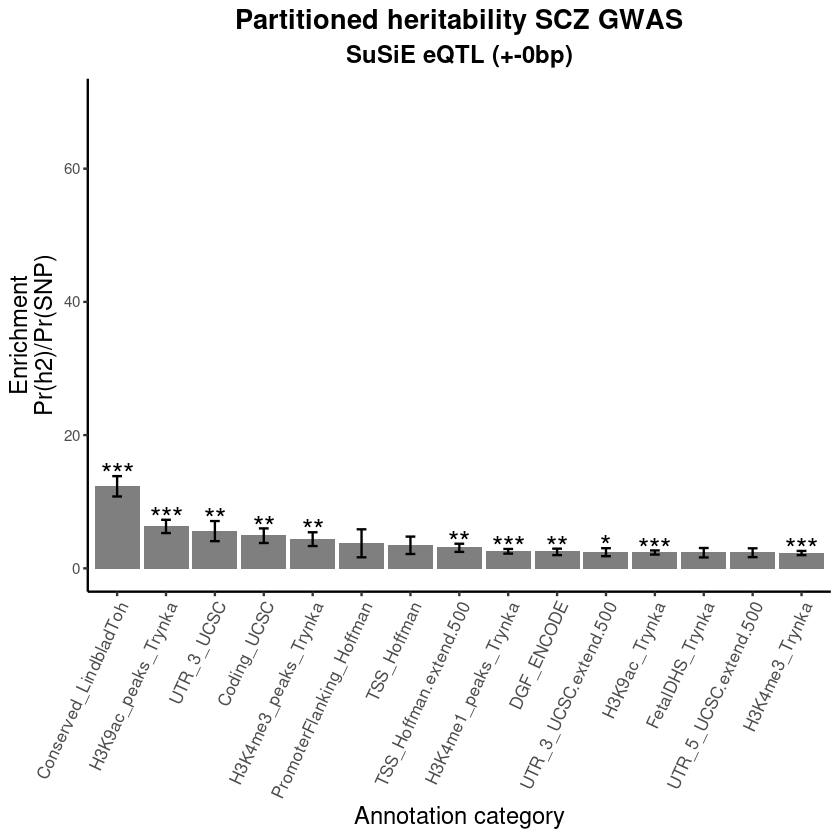

In [3]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_susie_0bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p1 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "SuSiE eQTL (+-0bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,70) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p1

### susie e/isoQTL, GTEx brain cortex maxCPP

In [74]:
eqtl <- read.table("results/SCZ.Clozuk.2018_mixed_eqtl_maxCPP.results", header = T, stringsAsFactors = F)
tail(eqtl)

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,UTR_3_UCSC.extend.500.bedL2_0,0.026455258,0.059344887,0.015855149,2.243217,0.5993194,4.239918e-02,-6.997698e-08,7.428431e-08,-0.9420157
50,UTR_5_UCSC.bedL2_0,0.005484168,0.007333504,0.010279588,1.337213,1.8744115,8.572912e-01,-9.494170e-08,1.547050e-07,-0.6136950
51,UTR_5_UCSC.extend.500.bedL2_0,0.026865078,0.055486668,0.017819161,2.065383,0.6632834,1.114578e-01,5.749310e-08,6.525592e-08,0.8810403
52,WeakEnhancer_Hoffman.bedL2_0,0.020987194,0.021814271,0.027129037,1.039409,1.2926472,9.756851e-01,-1.346878e-07,1.055391e-07,-1.2761889
53,WeakEnhancer_Hoffman.extend.500.bedL2_0,0.088786593,0.171817827,0.033498715,1.935178,0.3772947,1.543494e-02,6.703386e-08,4.287616e-08,1.5634294
54,L2_1,0.001044768,0.020226809,0.004347904,19.360105,4.1615995,1.815196e-05,2.547143e-06,5.990322e-07,4.2520971


In [75]:
isoqtl <- read.table("results/SCZ.Clozuk.2018_mixed_isoqtl_maxCPP.results", header = T, stringsAsFactors = F)
tail(isoqtl)

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,UTR_3_UCSC.extend.500.bedL2_0,0.026455258,0.056253405,0.015867669,2.126360,0.5997926,6.535297e-02,-7.779365e-08,7.418844e-08,-1.0485953
50,UTR_5_UCSC.bedL2_0,0.005484168,0.006207526,0.010375736,1.131899,1.8919434,9.444274e-01,-1.102763e-07,1.567843e-07,-0.7033632
51,UTR_5_UCSC.extend.500.bedL2_0,0.026865078,0.051521556,0.017584845,1.917789,0.6545615,1.639615e-01,5.229572e-08,6.502523e-08,0.8042374
52,WeakEnhancer_Hoffman.bedL2_0,0.020987194,0.022401436,0.027174669,1.067386,1.2948215,9.585034e-01,-1.321315e-07,1.056253e-07,-1.2509456
53,WeakEnhancer_Hoffman.extend.500.bedL2_0,0.088786593,0.172936488,0.033551644,1.947777,0.3778909,1.426748e-02,6.722220e-08,4.290758e-08,1.5666741
54,L2_1,0.001959136,0.025134516,0.004505755,12.829389,2.2998683,8.819691e-07,1.710036e-06,3.546748e-07,4.8214185


In [76]:
sqtl <- read.table("results/SCZ.Clozuk.2018_mixed_sqtl_maxCPP.results", header = T, stringsAsFactors = F)
tail(sqtl)

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49,UTR_3_UCSC.extend.500.bedL2_0,0.026455258,0.056340484,0.015916586,2.129652,0.6016417,6.520837e-02,-8.067735e-08,7.437279e-08,-1.0847697
50,UTR_5_UCSC.bedL2_0,0.005484168,0.006822125,0.010341217,1.243967,1.8856491,8.970911e-01,-9.889404e-08,1.551774e-07,-0.6372967
51,UTR_5_UCSC.extend.500.bedL2_0,0.026865078,0.051544081,0.017638030,1.918628,0.6565412,1.646137e-01,4.655139e-08,6.486297e-08,0.7176883
52,WeakEnhancer_Hoffman.bedL2_0,0.020987194,0.021686737,0.027141034,1.033332,1.2932188,9.794434e-01,-1.348755e-07,1.054961e-07,-1.2784882
53,WeakEnhancer_Hoffman.extend.500.bedL2_0,0.088786593,0.172214570,0.033608037,1.939646,0.3785260,1.524906e-02,6.700037e-08,4.289350e-08,1.5620169
54,L2_1,0.001529595,0.021022564,0.003786614,13.743873,2.4755659,1.190187e-06,1.987524e-06,4.162914e-07,4.7743584


In [50]:
# gtex <- read.table("results/SCZ.Clozuk.2018_Brain_Cortex_Analysis_MaxCPP.results", header = T, stringsAsFactors = F)
# tail(gtex)

In [92]:
eqtl$Enrichment_p_fdr <- p.adjust(eqtl$Enrichment_p, "fdr")
eqtl <- eqtl[order(eqtl$Enrichment, decreasing=TRUE),]
subset_eqtl <- eqtl[c(1:15),]
subset_eqtl[subset_eqtl$Category=="L2_1",1] <- "eQTL"
subset_eqtl$Category <- gsub(".bedL2_0","",subset_eqtl$Category)

isoqtl$Enrichment_p_fdr <- p.adjust(isoqtl$Enrichment_p, "fdr")
isoqtl[isoqtl$Category=="L2_1",1] <- "isoQTL"
isoqtl <- isoqtl %>% filter(Category == "isoQTL")

sqtl$Enrichment_p_fdr <- p.adjust(sqtl$Enrichment_p, "fdr")
sqtl[sqtl$Category=="L2_1",1] <- "sQTL"
sqtl <- sqtl %>% filter(Category == "sQTL")
subset_dat <- rbind(subset_eqtl, isoqtl, sqtl)

In [93]:
subset_dat <- subset_dat %>% mutate(Category = paste0(Category, " (", 100*signif(Prop._SNPs, 2), "%)"))
subset_dat

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Enrichment_p_fdr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54,eQTL (0.1%),0.001044768,0.02022681,0.004347904,19.360105,4.1615995,1.815196e-05,2.547143e-06,5.990322e-07,4.2520971,7.400414e-05
4,Conserved_LindbladToh (2.6%),0.025685106,0.31473720,0.039096135,12.253685,1.5221325,9.576883e-12,7.201237e-07,1.104312e-07,6.5210174,1.691916e-10
29,H3K9ac_peaks_Trynka (3.8%),0.038459467,0.23407845,0.037869574,6.086368,0.9846619,3.903545e-07,3.016582e-07,8.400303e-08,3.5910399,2.586099e-06
48,UTR_3_UCSC (1.1%),0.011185912,0.05919588,0.016864933,5.292003,1.5076940,4.986622e-03,2.968010e-07,1.760549e-07,1.6858435,1.016504e-02
2,Coding_UCSC (1.4%),0.014274909,0.06415758,0.015757439,4.494430,1.1038556,2.167961e-03,1.004289e-07,1.282412e-07,0.7831245,4.983513e-03
26,H3K4me3_peaks_Trynka (4.2%),0.041648780,0.17506887,0.042769542,4.203457,1.0269098,2.144366e-03,1.069898e-07,8.556296e-08,1.2504223,4.983513e-03
34,PromoterFlanking_Hoffman (0.83%),0.008308451,0.02967996,0.017430877,3.572262,2.0979694,2.227641e-01,9.168174e-08,1.708074e-07,0.5367550,3.027307e-01
46,TSS_Hoffman (1.8%),0.017832103,0.05330712,0.023070127,2.989391,1.2937412,1.237145e-01,-1.094803e-07,1.470967e-07,-0.7442741,1.873391e-01
47,TSS_Hoffman.extend.500 (3.4%),0.034353387,0.09904650,0.020858159,2.883166,0.6071646,2.142051e-03,1.097816e-07,9.548545e-08,1.1497211,4.983513e-03


In [94]:
# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

In [96]:
subset_dat$group <- "Baseline"
for(i in 1:nrow(subset_dat)) {
    if(subset_dat[i,'Category'] == "eQTL (0.1%)") {
        subset_dat[i,'group'] <- "eQTL"
    }
    if(subset_dat[i,'Category'] == "isoQTL (0.2%)") {
        subset_dat[i,'group'] <- "isoQTL"
    }
    if(subset_dat[i,'Category'] == "sQTL (0.15%)") {
        subset_dat[i,'group'] <- "sQTL"
    }
}
# subset_dat$color_cat <- factor(subset_dat$color_cat, levels = c("Baseline", "eQTL", "isoQTL", "sQTL"))

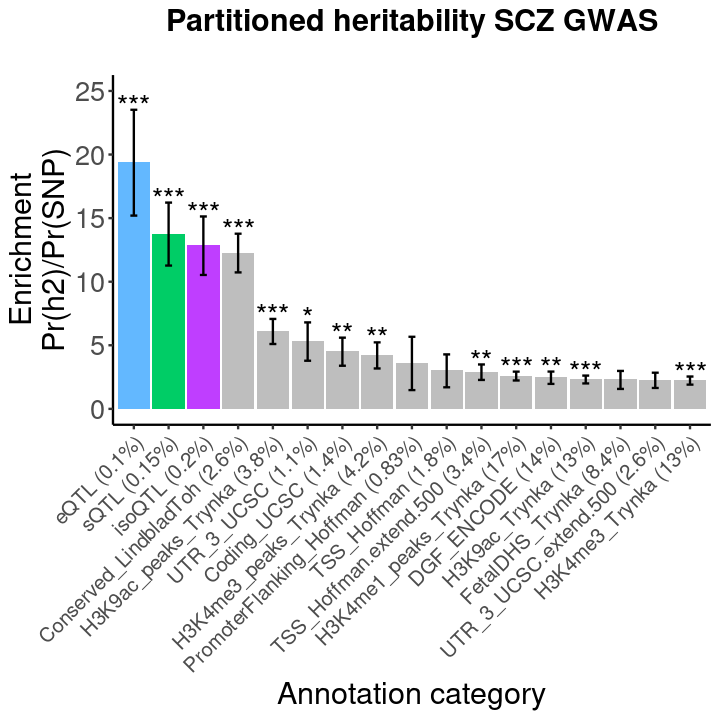

In [102]:
options(repr.plot.width = 6, repr.plot.height = 6)

p <- ggplot(subset_dat, aes(x = reorder(Category, -Enrichment), 
                            y = Enrichment)) +
  geom_bar(stat = "identity", width = .9, aes(fill = group)) +
  geom_errorbar(aes(ymin = (Enrichment-Enrichment_std_error), 
                    ymax = (Enrichment+Enrichment_std_error)), 
                width = .2) +
  scale_fill_manual(name = "Category", values=c("grey", "steelblue1", "darkorchid1", "springgreen3")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12),
        axis.text.y = element_text(size=16),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,25) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6) 
#   scale_x_discrete(labels = display)
            
p

In [103]:
ggsave("figures/enrich.png", p, height = 6, width = 6)

**Below figure is result with QTL annotations running together**

In [4]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_e_iso_sqtl_maxCPP.results", header = T, stringsAsFactors = F)

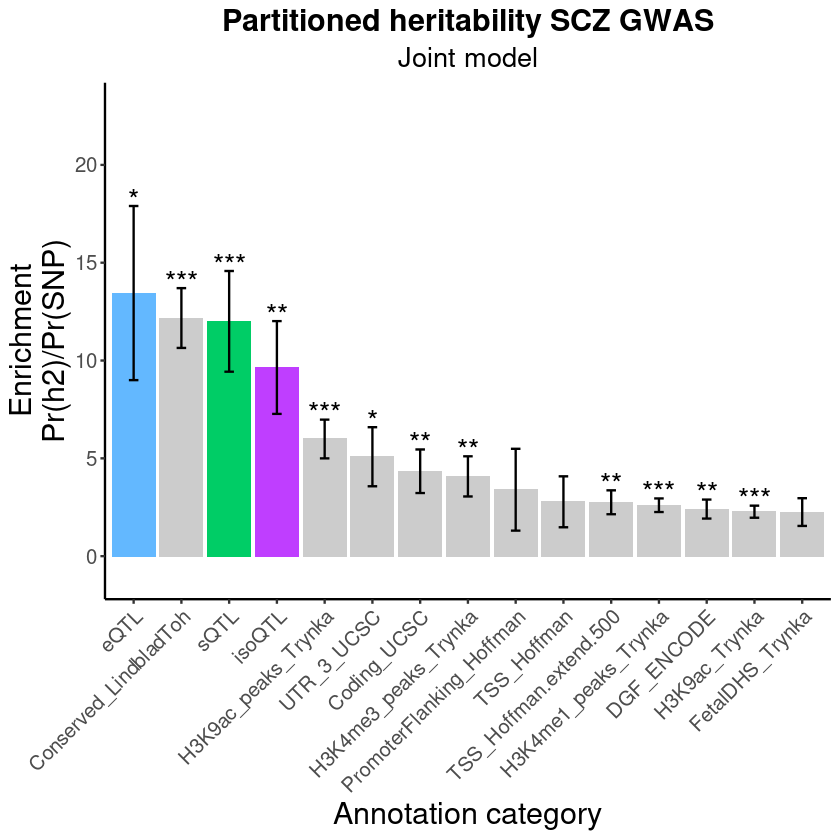

In [7]:
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat[subset_dat$Category=="L2_2",1] <- "isoQTL"
subset_dat[subset_dat$Category=="L2_3",1] <- "sQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & 
                                                 subset_dat$Enrichment_p_fdr>.01,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & 
                                                   subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & 
                                                 subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & 
                                                   subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                            Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

subset_dat$group <- "Baseline"
for(i in 1:nrow(subset_dat)) {
    if(subset_dat[i,'Category'] == "eQTL") {
        subset_dat[i,'group'] <- "eQTL"
    }
    if(subset_dat[i,'Category'] == "isoQTL") {
        subset_dat[i,'group'] <- "isoQTL"
    }
    if(subset_dat[i,'Category'] == "sQTL") {
        subset_dat[i,'group'] <- "sQTL"
    }
}

p1 <- ggplot(subset_dat, aes(x = reorder(Category,-Enrichment), 
                             y = Enrichment)) +
  geom_bar(stat = "identity", width = .9, aes(fill = group)) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), 
                    ymax=(Enrichment+Enrichment_std_error)), 
                    width=.2) +
  scale_fill_manual(name = "Category", values=c("grey80", "steelblue1", "darkorchid1", "springgreen3")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Joint model") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=12),
        axis.text.y = element_text(size=12),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=16, hjust = 0.5),
        legend.position = "none") +
  ylim(-1,23) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p1

In [9]:
ggsave("figures/joint.pdf", p1, height = 6, width = 6)

### tau
Standardized effect size is defined as the proportionate change in per-SNP heritability associated with an increase in the value of the annotation by one standard deviation, conditional  on  other  annotations  included  in  the  model. Unlike  enrichment, τ* quantifies effects that are unique to the focal annotation

In [106]:
isoqtl

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Enrichment_p_fdr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
isoQTL,0.001959136,0.02513452,0.004505755,12.82939,2.299868,8.819691e-07,1.710036e-06,3.546748e-07,4.821419,8.819691e-07


In [107]:
tau_df <- rbind(eqtl[1,], isoqtl[1,], sqtl[1,])
tau_df

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Enrichment_p_fdr
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54,L2_1,0.001044768,0.02022681,0.004347904,19.36010,4.161599,1.815196e-05,2.547143e-06,5.990322e-07,4.252097,7.400414e-05
1,isoQTL,0.001959136,0.02513452,0.004505755,12.82939,2.299868,8.819691e-07,1.710036e-06,3.546748e-07,4.821419,8.819691e-07
11,sQTL,0.001529595,0.02102256,0.003786614,13.74387,2.475566,1.190187e-06,1.987524e-06,4.162914e-07,4.774358,1.190187e-06


In [108]:
tau_df[1,'Category'] <- "eQTL (0.1%)"
tau_df[2,'Category'] <- "isoQTL (0.2%)"
tau_df[3,'Category'] <- "sQTL (0.15%)"
tau_df$Category <- factor(tau_df$Category, levels = c("eQTL (0.1%)", 
                                                      "isoQTL (0.2%)", 
                                                      "sQTL (0.15%)"))

In [109]:
tau_df <- tau_df %>% mutate(tau_pval = 2*pnorm(Coefficient_z.score, lower.tail = FALSE))

In [110]:
# Adding asterisk for p-val significance
tau_df$asterisk_pos <- 1.01 * (tau_df$Coefficient + tau_df$Coefficient_std_error)

# signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & 
#                                                  subset_dat$Enrichment_p_fdr>.01,'Category'],
#                            Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & 
#                                                    subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
# signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & 
#                                                  subset_dat$Enrichment_p_fdr>.001,'Category'],
#                            Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & 
#                                                    subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = tau_df[tau_df$tau_pval <= .001, 'Category'],
                            Coefficient = tau_df[tau_df$tau_pval <= .001, 'asterisk_pos'])

In [111]:
signif_df_001

Category,Coefficient
<fct>,<dbl>
eQTL (0.1%),3.177637e-06
isoQTL (0.2%),2.085358e-06
sQTL (0.15%),2.427854e-06


In [112]:
tau_df

,Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Enrichment_p_fdr,tau_pval,asterisk_pos
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54,eQTL (0.1%),0.001044768,0.02022681,0.004347904,19.36010,4.161599,1.815196e-05,2.547143e-06,5.990322e-07,4.252097,7.400414e-05,2.117780e-05,3.177637e-06
1,isoQTL (0.2%),0.001959136,0.02513452,0.004505755,12.82939,2.299868,8.819691e-07,1.710036e-06,3.546748e-07,4.821419,8.819691e-07,1.425409e-06,2.085358e-06
11,sQTL (0.15%),0.001529595,0.02102256,0.003786614,13.74387,2.475566,1.190187e-06,1.987524e-06,4.162914e-07,4.774358,1.190187e-06,1.802811e-06,2.427854e-06


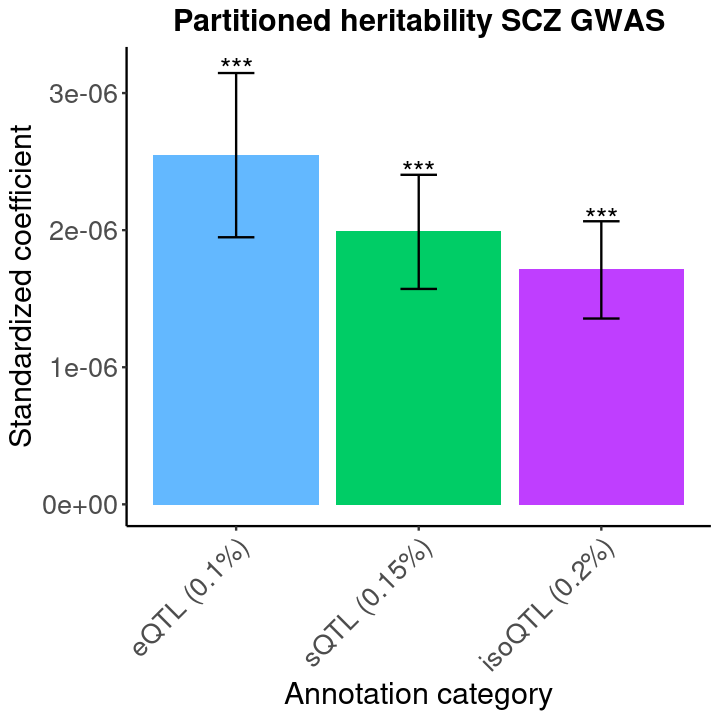

In [113]:
p <- ggplot(tau_df, aes(x = reorder(Category, -Coefficient), 
                        y = Coefficient)) +
  geom_bar(stat = "identity", width = .9, aes(fill = Category)) +
  geom_errorbar(aes(ymin = (Coefficient - Coefficient_std_error), 
                    ymax = (Coefficient + Coefficient_std_error)), 
                    width = .2) +
  scale_fill_manual(name = "Category", values=c("steelblue1", "darkorchid1", "springgreen3")) +
  ggtitle("Partitioned heritability SCZ GWAS") +
  xlab("Annotation category") +
  ylab("Standardized coefficient") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.position = "none") +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

In [114]:
ggsave("figures/tau.png", p, width = 6, height = 6)

### SCZ, mixed top eQTL

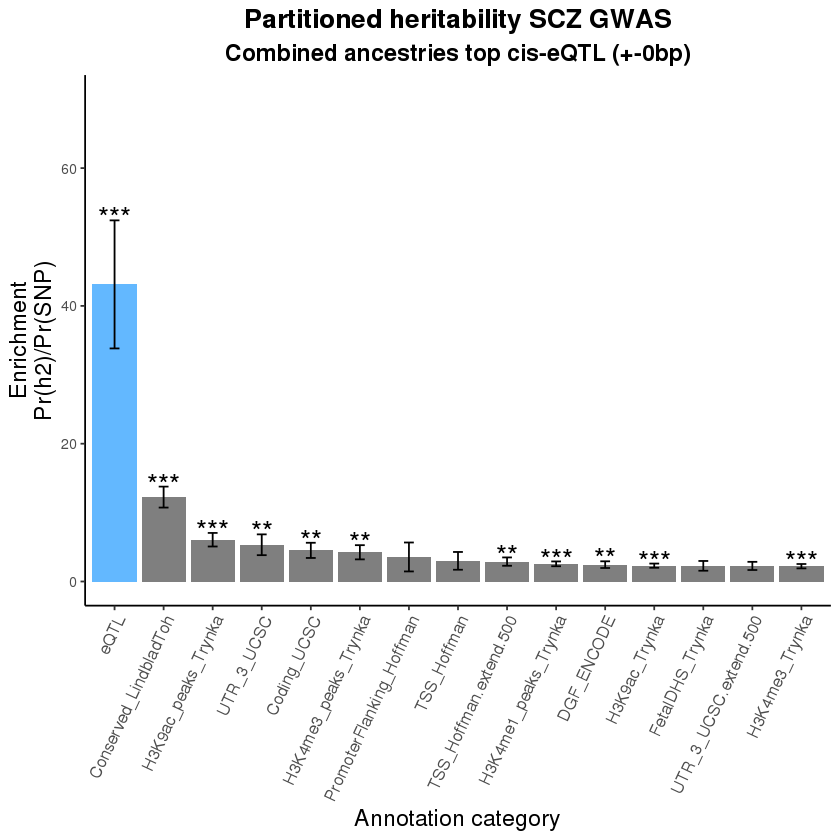

In [5]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_0bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p1 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-0bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,70) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p1
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_eqtl_0bp_window.png", p1, height=6, width=6)

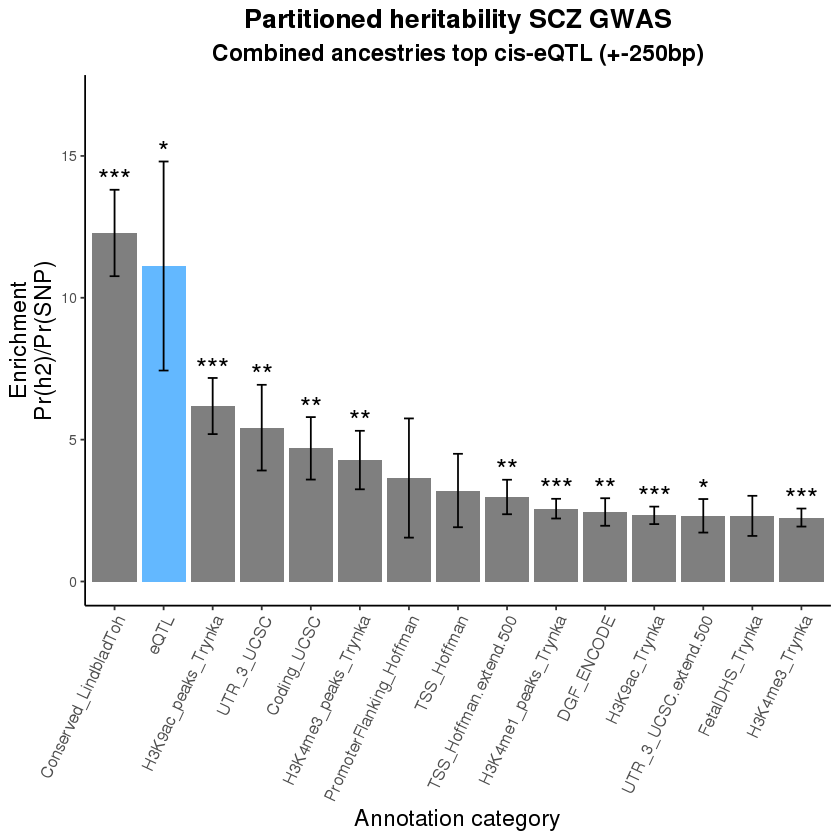

In [17]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_250bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p2 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-250bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p2
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_eqtl_250bp_window.png", p2, height=6, width=6)

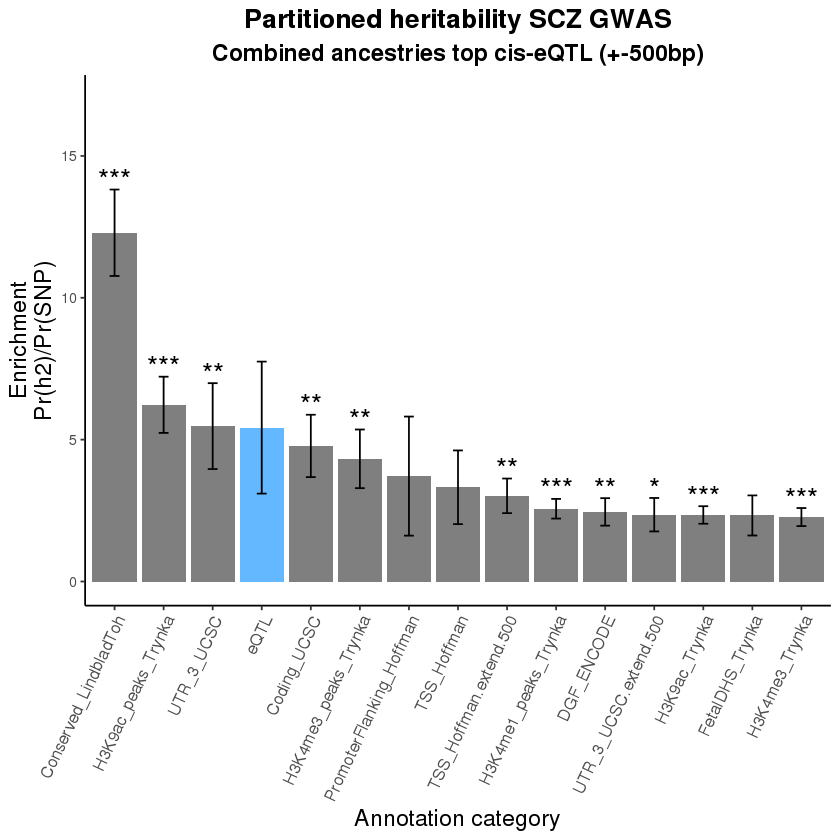

In [8]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p3 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p3

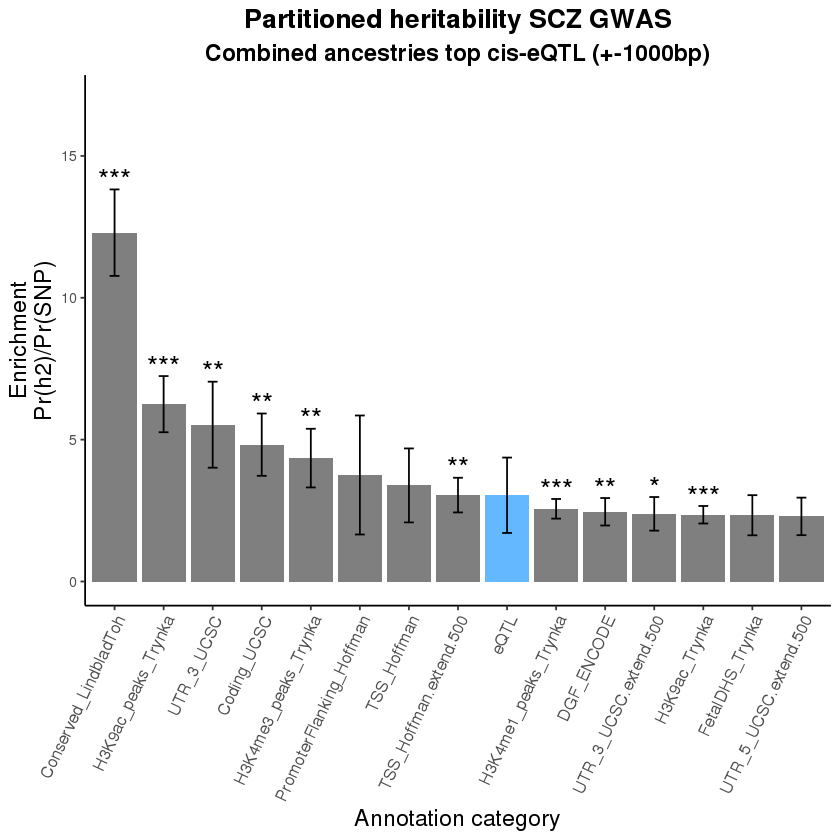

In [9]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_1000bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p4 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-1000bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p4

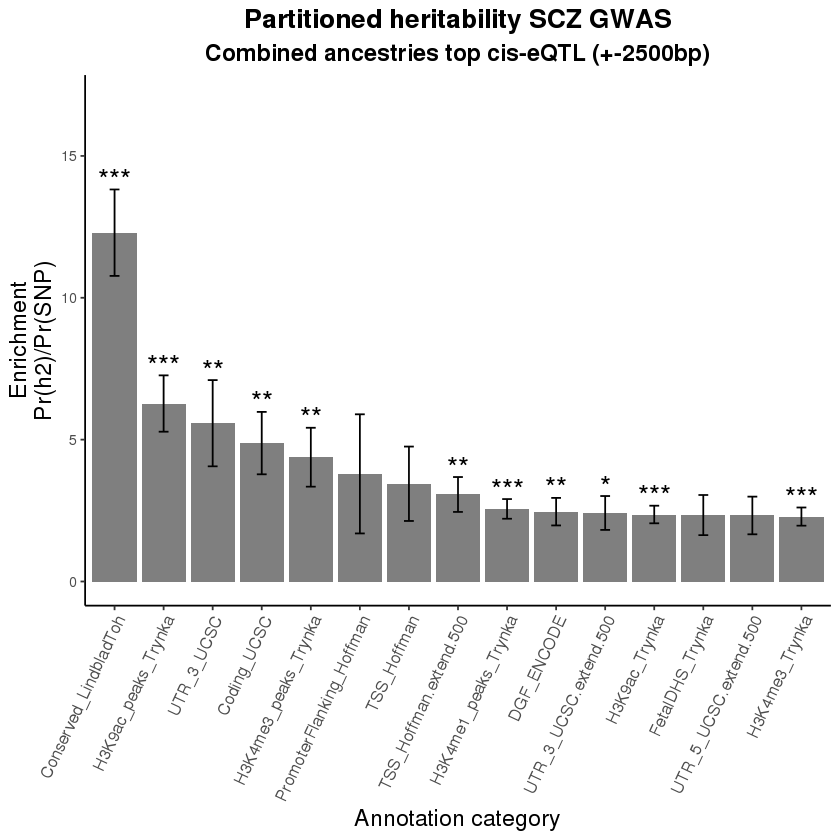

In [10]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_eqtl_2500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "eQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])
p5 <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="eQTL","eQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","steelblue1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-eQTL (+-2500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,17) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p5

### More GWAS, mixed top eQTL
Now omitting bonferroni correction and significance level. Need to calculate that within each trait.

In [7]:
setwd("./results/")
results <- list.files(pattern = "*_mixed_top_eqtl.results")

In [12]:
results

[1] "ALZ.Jansen.2019_mixed_top_eqtl.results"               
[2] "ASD.iPSYCHPGC.2018_mixed_top_eqtl.results"            
[3] "BD.PGC3_mixed_top_eqtl.results"                       
[4] "EduYears.SSGAC.Lee2018_mixed_top_eqtl.results"        
[5] "Insomnia.Jansen.2018_mixed_top_eqtl.results"          
[6] "Intelligence.SavageNatGen.2018_mixed_top_eqtl.results"
[7] "MDD.PGC.2018_mixed_top_eqtl.results"                  
[8] "SCZ.Clozuk.2018_mixed_top_eqtl.results"

In [19]:
strsplit(results[1], split="_")[[1]][1]

[1] "ALZ.Jansen.2019"

In [20]:
for (i in 1:length(results)) {
    file_name <- strsplit(results[i], split = "_")[[1]][1]
    file_df <- read.table(results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

In [21]:
ls()

[1] "ALZ.Jansen.2019"                "ASD.iPSYCHPGC.2018"            
 [3] "BD.PGC3"                        "EduYears.SSGAC.Lee2018"        
 [5] "file_df"                        "file_name"                     
 [7] "i"                              "Insomnia.Jansen.2018"          
 [9] "Intelligence.SavageNatGen.2018" "MDD.PGC.2018"                  
[11] "myfiles"                        "results"                       
[13] "SCZ.Clozuk.2018"                "trait"                         
[15] "traits"

In [28]:
df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
df <- df %>% filter(Category == "L2_1")
df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")

In [29]:
df

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Trait
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
L2_1,0.002999584,0.01578311,0.082270743,5.261766,27.427380,0.8896232304,1.247765e-09,5.516238e-08,0.02261985,ALZ.Jansen.2019
L2_1,0.002999584,0.02742948,0.026950328,9.144425,8.984687,0.3619978424,2.302563e-07,2.609979e-07,0.88221520,ASD.iPSYCHPGC.2018
L2_1,0.002999584,0.01356646,0.015168311,4.522781,5.056804,0.4860475974,2.800624e-08,5.291421e-08,0.52927633,BD.PGC3
L2_1,0.002999584,0.03083254,0.007876888,10.278937,2.625993,0.0005039176,1.544343e-07,4.486393e-08,3.44228277,EduYears.SSGAC.Lee2018
L2_1,0.002999584,0.02612940,0.015321874,8.711007,5.107999,0.1352008033,4.889490e-08,3.555285e-08,1.37527380,Insomnia.Jansen.2018
L2_1,0.002999584,0.03008507,0.012714436,10.029745,4.238732,0.0343044414,2.438536e-07,1.216811e-07,2.00403824,Intelligence.SavageNatGen.2018
L2_1,0.002999584,0.01330874,0.018576135,4.436860,6.192903,0.5807367638,3.097151e-08,6.431031e-08,0.48159474,MDD.PGC.2018
L2_1,0.002999584,0.03965666,0.011754549,13.220717,3.918726,0.0022177811,7.348389e-07,2.459089e-07,2.98825688,SCZ.Clozuk.2018


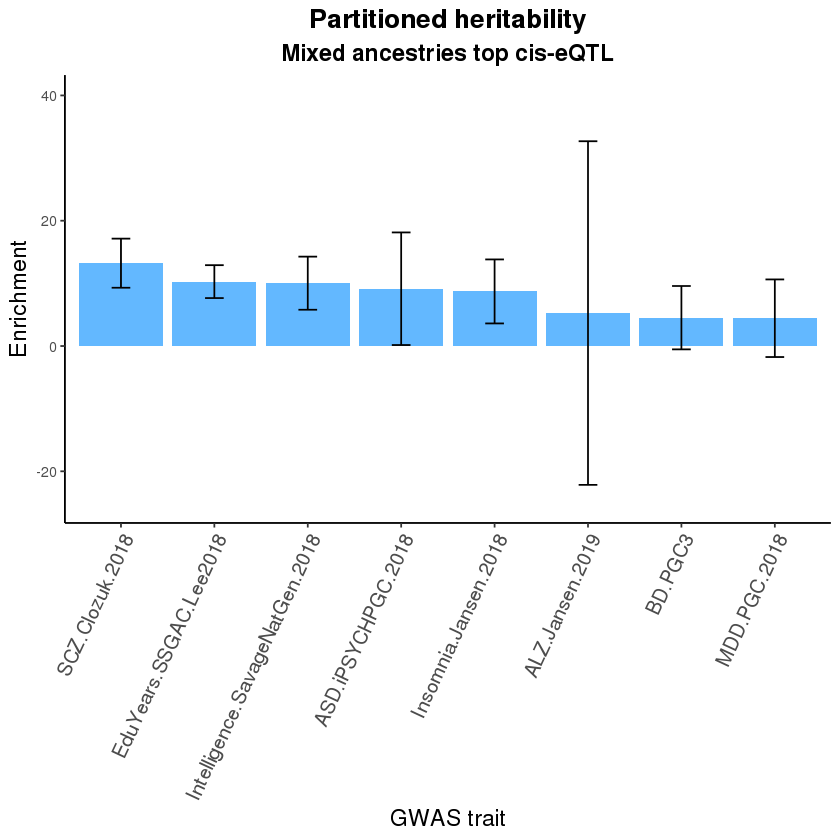

In [82]:
p1 <- ggplot(df, aes(x=reorder(Trait, -Enrichment), y=Enrichment)) +
  geom_bar(stat = "identity", width = .9, fill="steelblue1") +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  ggtitle("Partitioned heritability", subtitle = "Mixed ancestries top cis-eQTL") +
  xlab("GWAS trait") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=12),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(-25,40)
#   scale_fill_brewer(palette="Set1")
#   scale_fill_manual(values = wes_palette(n=8, name="Moonrise3", type="continuous"))
p1

In [86]:
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/enrichment_mixed_top_eqtl.png", p1, width = 6, height = 6)

### SCZ, mixed top isoQTL per isoGene (???)

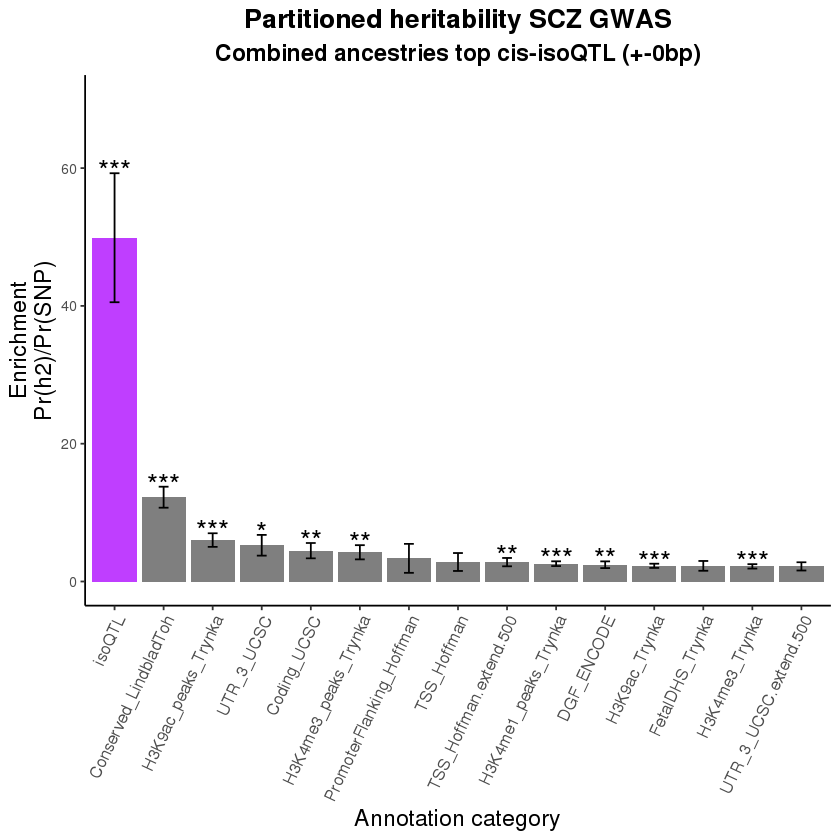

In [4]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_0bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-0bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,70) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_isoqtl_0bp_window.png", p, height = 6, width = 6)

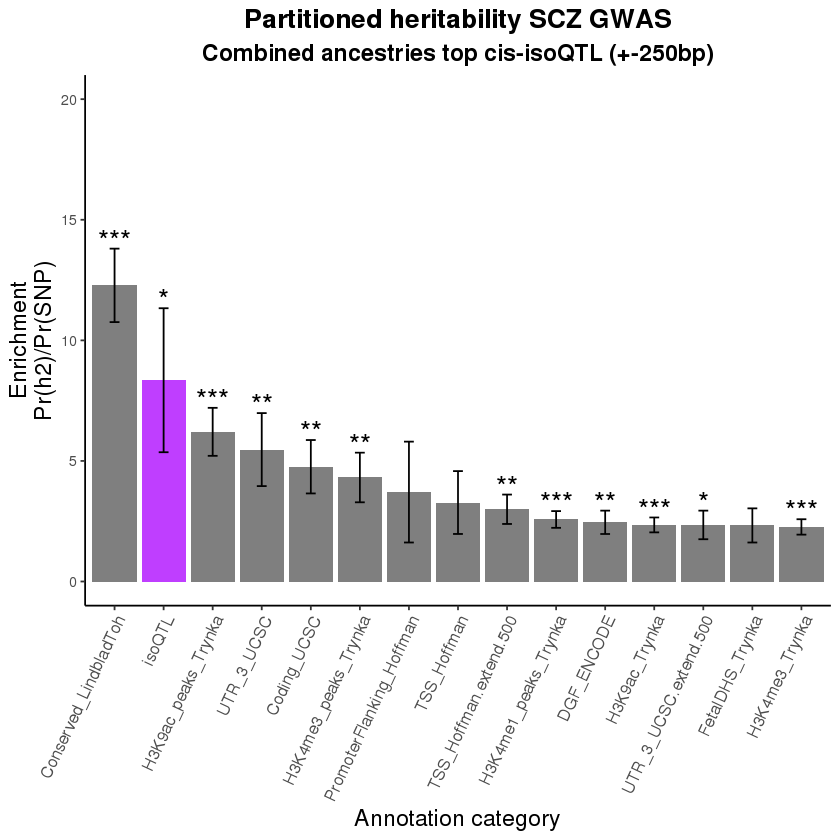

In [18]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_250bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-250bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/SCZ.Clozuk.2018_mixed_top_isoqtl_250bp_window.png", p, height = 6, width = 6)

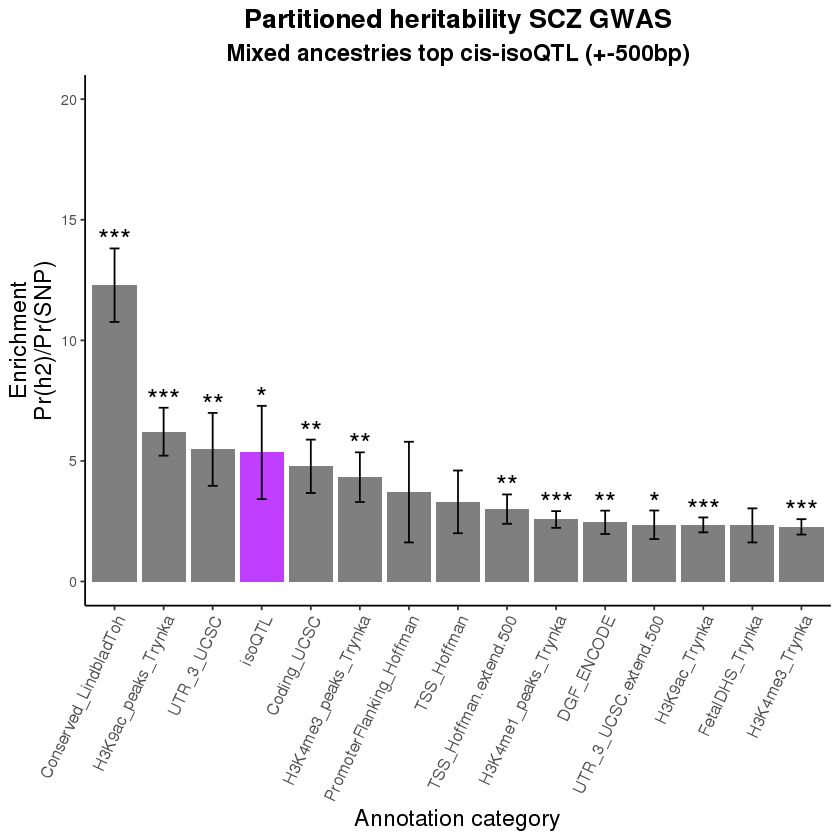

In [13]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Mixed ancestries top cis-isoQTL (+-500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

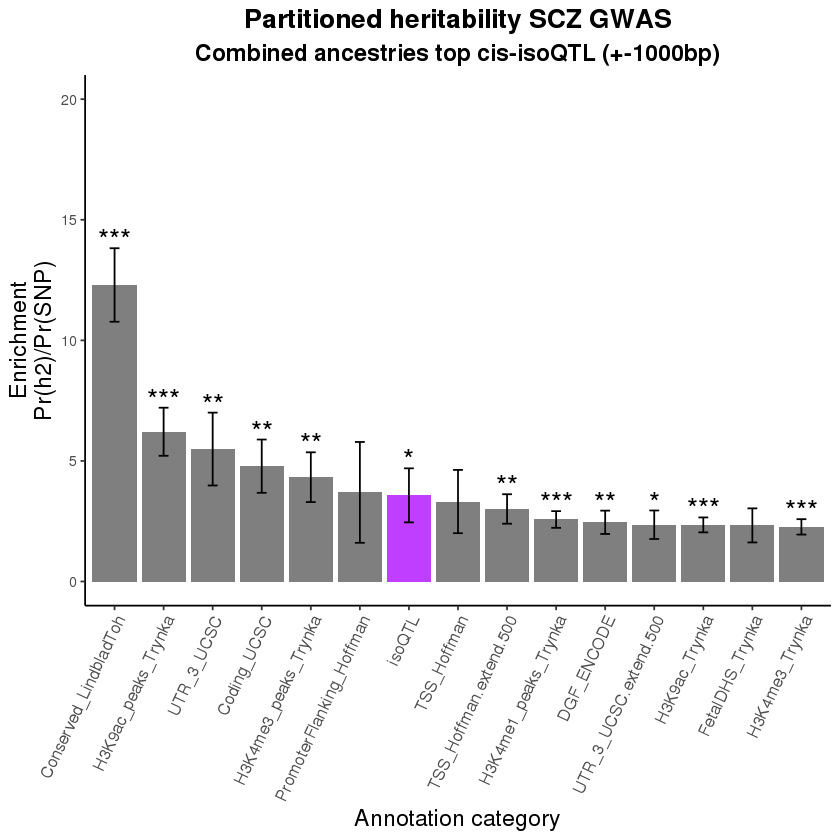

In [14]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_1000bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-1000bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

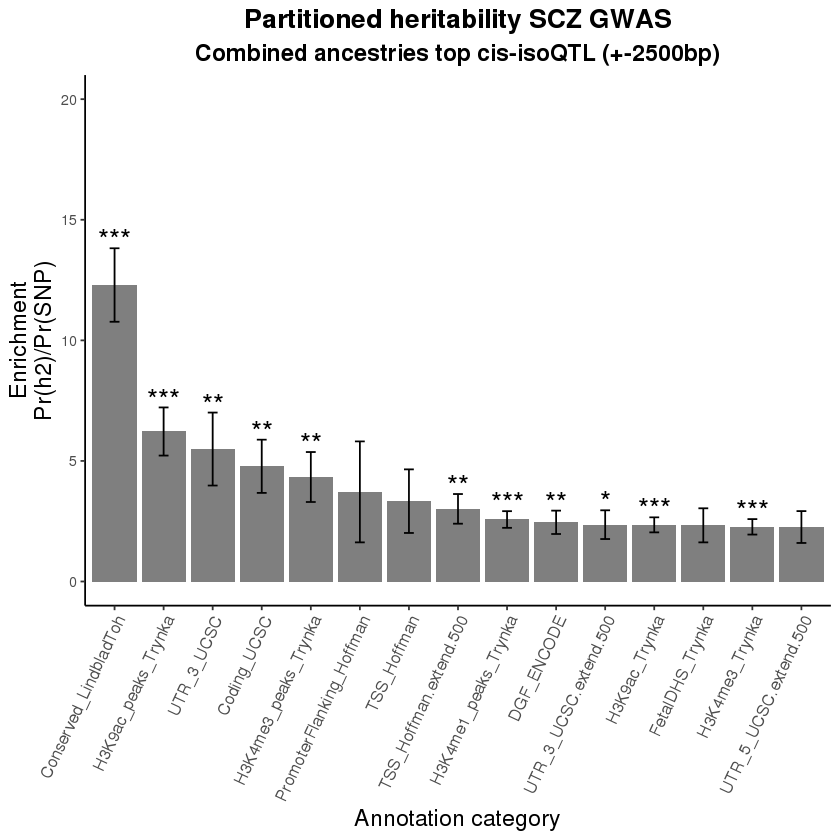

In [15]:
dat <- read.table("results/SCZ.Clozuk.2018_mixed_top_isoqtl_2500bp_window.results", header = T, stringsAsFactors = F)
dat$Enrichment_p_fdr <- p.adjust(dat$Enrichment_p, "fdr")
dat <- dat[order(dat$Enrichment, decreasing=TRUE),]
subset_dat <- dat[c(1:15),]
subset_dat[subset_dat$Category=="L2_1",1] <- "isoQTL"
subset_dat$Category <- gsub(".bedL2_0","",subset_dat$Category)

# Adding asterisk for p-val significance
subset_dat$asterisk_pos <- subset_dat$Enrichment + subset_dat$Enrichment_std_error + .35
signif_df_05 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01,'Category'],
                        Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.05 & subset_dat$Enrichment_p_fdr>.01, 'asterisk_pos'])
signif_df_01 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.01 & subset_dat$Enrichment_p_fdr>.001, 'asterisk_pos'])
signif_df_001 <- data.frame(Category = subset_dat[subset_dat$Enrichment_p_fdr<=.001,'Category'],
                           Enrichment = subset_dat[subset_dat$Enrichment_p_fdr<=.001, 'asterisk_pos'])

p <- ggplot(subset_dat, aes(x=reorder(Category,-Enrichment), y=Enrichment,
                        fill=factor(ifelse(Category=="isoQTL","isoQTL","Baseline")))) +
  geom_bar(stat = "identity", width = .9) +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  scale_fill_manual(name = "Category", values=c("grey50","darkorchid1")) +
  ggtitle("Partitioned heritability SCZ GWAS", subtitle = "Combined ancestries top cis-isoQTL (+-2500bp)") +
  xlab("Annotation category") +
  ylab("Enrichment\nPr(h2)/Pr(SNP)") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=10),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(0,20) +
  geom_text(data = signif_df_05, label = "*", size = 6) +
  geom_text(data = signif_df_01, label = "**", size = 6) +
  geom_text(data = signif_df_001, label = "***", size = 6)
p

### More GWAS, top isoQTL

In [4]:
setwd("./results/")
results <- list.files(pattern = "*_mixed_top_isoqtl.results")

In [5]:
for (i in 1:length(results)) {
    file_name <- strsplit(results[i], split = "_")[[1]][1]
    file_df <- read.table(results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
df <- df %>% filter(Category == "L2_1")
df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")

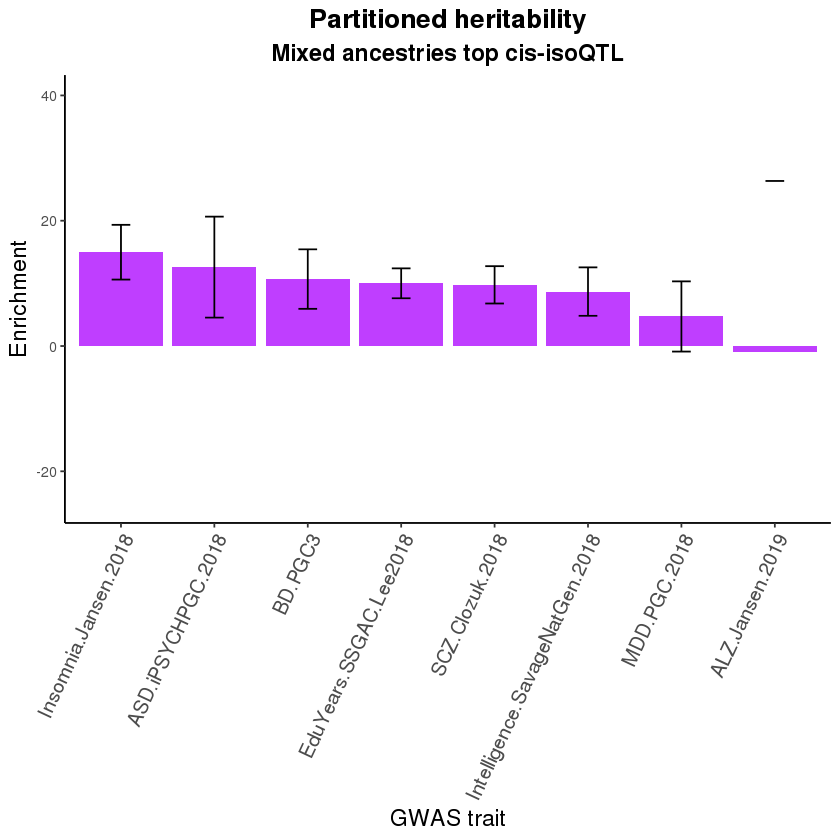

In [11]:
p1 <- ggplot(df, aes(x=reorder(Trait, -Enrichment), y=Enrichment)) +
  geom_bar(stat = "identity", width = .9, fill="darkorchid1") +
  geom_errorbar(aes(ymin=(Enrichment-Enrichment_std_error), ymax=(Enrichment+Enrichment_std_error)), 
                width=.2) +
  ggtitle("Partitioned heritability", subtitle = "Mixed ancestries top cis-isoQTL") +
  xlab("GWAS trait") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 65, hjust = 1, size=12),
        axis.title = element_text(size=14),
        plot.title = element_text(size=16, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=14, face="bold", hjust = 0.5),
        legend.position = "none") +
  ylim(-25,40)
#   scale_fill_brewer(palette="Set1")
#   scale_fill_manual(values = wes_palette(n=8, name="Moonrise3", type="continuous"))
p1

In [12]:
ggsave("~/project-gandalm/isoform_twas/sLDSC/figures/enrichment_mixed_top_isoqtl.png", p1, width = 6, height = 6)

## Enrichment tile plot

In [2]:
setwd("./results/")
iso.results <- list.files(pattern = "*_mixed_isoqtl_maxCPP.results")

In [4]:
iso.results

[1] "ALZ.Jansen.2019_mixed_isoqtl_maxCPP.results"               
[2] "ASD.iPSYCHPGC.2018_mixed_isoqtl_maxCPP.results"            
[3] "BD.PGC3_mixed_isoqtl_maxCPP.results"                       
[4] "EduYears.SSGAC.Lee2018_mixed_isoqtl_maxCPP.results"        
[5] "Insomnia.Jansen.2018_mixed_isoqtl_maxCPP.results"          
[6] "Intelligence.SavageNatGen.2018_mixed_isoqtl_maxCPP.results"
[7] "MDD.PGC.2018_mixed_isoqtl_maxCPP.results"                  
[8] "SCZ.Clozuk.2018_mixed_isoqtl_maxCPP.results"

In [3]:
e.results <- list.files(pattern = "*_mixed_eqtl_maxCPP.results")

In [4]:
s.results <- list.files(pattern = "*_mixed_sqtl_maxCPP.results")

In [5]:
gtex.results <- list.files(pattern = "*_Brain_Cortex_Analysis_MaxCPP.results")

In [6]:
end.res <- list.files(pattern = "*_end_100hcp_maxCPP.results")
ex.res <- list.files(pattern = "*_ex_90hcp_maxCPP.results")
in.res <- list.files(pattern = "*_in_90hcp_maxCPP.results")
ip.res <- list.files(pattern = "*_ip_80hcp_maxCPP.results")
mic.res <- list.files(pattern = "*_mic_80hcp_maxCPP.results")
opc.res <- list.files(pattern = "*_opc_80hcp_maxCPP.results")
per.res <- list.files(pattern = "*_per_70hcp_maxCPP.results")
pg.res <- list.files(pattern = "*_pg_80hcp_maxCPP.results")
rg.res <- list.files(pattern = "*_rg_100hcp_maxCPP.results")

In [7]:
tri1.res <- list.files(pattern = "*_tri1_25hcp_eqtl_maxCPP.result")
tri2.res <- list.files(pattern = "*_tri2_15hcp_eqtl_maxCPP.result")

In [10]:
for (i in 1:length(iso.results)) {
    file_name <- strsplit(iso.results[i], split = "_")[[1]][1]
    file_df <- read.table(iso.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

iso.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
iso.df <- iso.df %>% filter(Category == "L2_1")
iso.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
iso.df$Group <- "isoQTL (0.2%)"

In [11]:
for (i in 1:length(e.results)) {
    file_name <- strsplit(e.results[i], split = "_")[[1]][1]
    file_df <- read.table(e.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

e.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
e.df <- e.df %>% filter(Category == "L2_1")
e.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
e.df$Group <- "eQTL (0.1%)"

In [12]:
for (i in 1:length(s.results)) {
    file_name <- strsplit(s.results[i], split = "_")[[1]][1]
    file_df <- read.table(s.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

s.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
s.df <- s.df %>% filter(Category == "L2_1")
s.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
s.df$Group <- "sQTL (0.15%)"

In [13]:
for (i in 1:length(gtex.results)) {
    file_name <- strsplit(gtex.results[i], split = "_")[[1]][1]
    file_df <- read.table(gtex.results[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
}

gtex.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
gtex.df <- gtex.df %>% filter(Category == "L2_1")
gtex.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
gtex.df$Group <- "GTEx Brain Cortex eQTL (0.05%)"

In [14]:
for (i in 1:length(end.res)) {
    file_name <- strsplit(end.res[i], split = "_")[[1]][1]
    file_df <- read.table(end.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

end.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
end.df <- end.df %>% filter(Category == "L2_1")
end.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
end.df$Group <- "end (0.06%)"

In [15]:
for (i in 1:length(ex.res)) {
    file_name <- strsplit(ex.res[i], split = "_")[[1]][1]
    file_df <- read.table(ex.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

ex.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
ex.df <- ex.df %>% filter(Category == "L2_1")
ex.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
ex.df$Group <- "ex (0.07%)"

In [16]:
for (i in 1:length(in.res)) {
    file_name <- strsplit(in.res[i], split = "_")[[1]][1]
    file_df <- read.table(in.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

in.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
in.df <- in.df %>% filter(Category == "L2_1")
in.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
in.df$Group <- "in (0.06%)"

In [17]:
for (i in 1:length(ip.res)) {
    file_name <- strsplit(ip.res[i], split = "_")[[1]][1]
    file_df <- read.table(ip.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

ip.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
ip.df <- ip.df %>% filter(Category == "L2_1")
ip.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
ip.df$Group <- "ip (0.06%)"

In [18]:
for (i in 1:length(mic.res)) {
    file_name <- strsplit(mic.res[i], split = "_")[[1]][1]
    file_df <- read.table(mic.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

mic.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
mic.df <- mic.df %>% filter(Category == "L2_1")
mic.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
mic.df$Group <- "mic (0.04%)"

In [19]:
for (i in 1:length(opc.res)) {
    file_name <- strsplit(opc.res[i], split = "_")[[1]][1]
    file_df <- read.table(opc.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

opc.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
opc.df <- opc.df %>% filter(Category == "L2_1")
opc.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
opc.df$Group <- "opc (0.04%)"

In [20]:
for (i in 1:length(per.res)) {
    file_name <- strsplit(per.res[i], split = "_")[[1]][1]
    file_df <- read.table(per.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

per.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
per.df <- per.df %>% filter(Category == "L2_1")
per.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
per.df$Group <- "per (0.03%)"

In [21]:
for (i in 1:length(pg.res)) {
    file_name <- strsplit(pg.res[i], split = "_")[[1]][1]
    file_df <- read.table(pg.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

pg.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
pg.df <- pg.df %>% filter(Category == "L2_1")
pg.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
pg.df$Group <- "pg (0.06%)"

In [22]:
for (i in 1:length(rg.res)) {
    file_name <- strsplit(rg.res[i], split = "_")[[1]][1]
    file_df <- read.table(rg.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

rg.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
rg.df <- rg.df %>% filter(Category == "L2_1")
rg.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
rg.df$Group <- "rg (0.07%)"

In [23]:
for (i in 1:length(tri1.res)) {
    file_name <- strsplit(tri1.res[i], split = "_")[[1]][1]
    file_df <- read.table(tri1.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

tri1.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
tri1.df <- tri1.df %>% filter(Category == "L2_1")
tri1.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
tri1.df$Group <- "Trimester 1 eQTL (0.04%)"

In [24]:
for (i in 1:length(tri2.res)) {
    file_name <- strsplit(tri2.res[i], split = "_")[[1]][1]
    file_df <- read.table(tri2.res[i], header = T, stringsAsFactors = F)
    assign(x = file_name, value = file_df, envir = .GlobalEnv)
    }

tri2.df <- rbind(ALZ.Jansen.2019, ASD.iPSYCHPGC.2018, BD.PGC3, EduYears.SSGAC.Lee2018, 
                Insomnia.Jansen.2018, Intelligence.SavageNatGen.2018, MDD.PGC.2018, SCZ.Clozuk.2018)
tri2.df <- tri2.df %>% filter(Category == "L2_1")
tri2.df$Trait <- c("ALZ.Jansen.2019", "ASD.iPSYCHPGC.2018", "BD.PGC3", 
                  "EduYears.SSGAC.Lee2018", "Insomnia.Jansen.2018", 
                  "Intelligence.SavageNatGen.2018", "MDD.PGC.2018", "SCZ.Clozuk.2018")
tri2.df$Group <- "Trimester 2 eQTL (0.02%)"

In [25]:
df <- rbind(e.df, iso.df, s.df, gtex.df, 
            end.df, ex.df, in.df, ip.df, mic.df, opc.df, per.df, pg.df, rg.df, 
            tri1.df, tri2.df)
df$Group <- factor(df$Group, levels = c("eQTL (0.1%)", "isoQTL (0.2%)", "sQTL (0.15%)",
                                        "GTEx Brain Cortex eQTL (0.05%)", 
                                        "end (0.06%)", "ex (0.07%)", "in (0.06%)", "ip (0.06%)",
                                        "mic (0.04%)", "opc (0.04%)", "per (0.03%)", "pg (0.06%)", "rg (0.07%)",
                                        "Trimester 1 eQTL (0.04%)", "Trimester 2 eQTL (0.02%)"))

In [28]:
df <- df %>% 
    mutate(tau_pval = pnorm(Coefficient_z.score, lower.tail = FALSE)) %>%
    mutate(tau_fdr = p.adjust(tau_pval, method = 'fdr')) %>% 
    mutate(enrich_fdr = p.adjust(Enrichment_p, method = 'fdr'))
#     mutate(tau.signif = ifelse(0.01 < tau_fdr < 0.05, "*", "")) %>%
#     mutate(en.signif = ifelse(enrich_fdr < 0.05, "*", ""))
df$tau.signif <- df$en.signif <- ' '
for (i in 1:nrow(df)) {
    if (df[i,'tau_fdr'] < 0.05 & df[i,'tau_fdr'] > 0.01) {
        df[i,'tau.signif'] <- "*"
    }
    if (df[i,'tau_fdr'] < 0.01 & df[i,'tau_fdr'] > 0.001) {
        df[i,'tau.signif'] <- "**"
    }
    if (df[i,'tau_fdr'] < 0.001) {
        df[i,'tau.signif'] <- "***"
    }
    if (df[i,'enrich_fdr'] < 0.05 & df[i,'enrich_fdr'] > 0.01) {
        df[i,'en.signif'] <- "*"
    }
    if (df[i,'enrich_fdr'] < 0.01 & df[i,'enrich_fdr'] > 0.001) {
        df[i,'en.signif'] <- "**"
    }
    if (df[i,'enrich_fdr'] < 0.001) {
        df[i,'en.signif'] <- "***"
    }
}

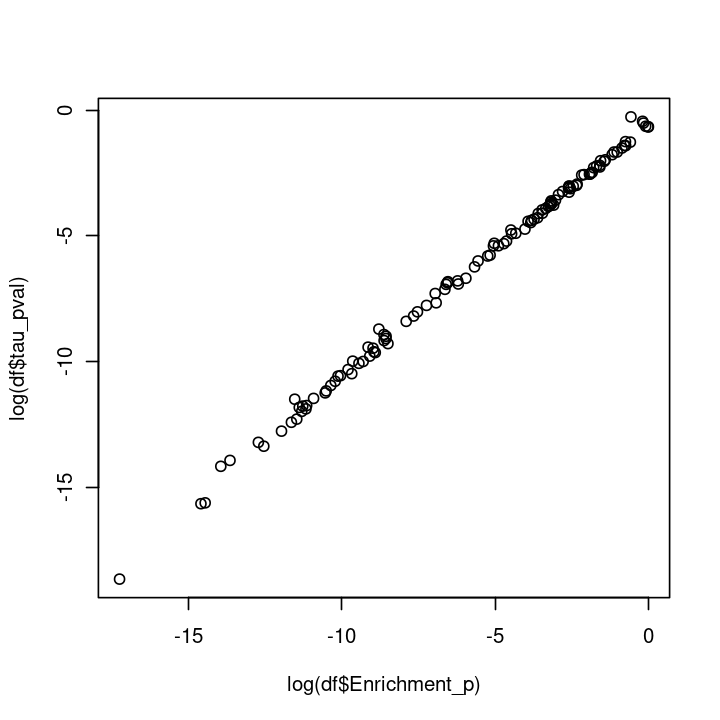

In [29]:
options(repr.plot.width = 6, repr.plot.height = 6)
plot(log(df$Enrichment_p), log(df$tau_pval))

In [30]:
# df <- df %>%
#     mutate(set = ifelse(Group %in% c("eQTL (0.1%)", "isoQTL (0.2%)", "sQTL (0.15%)"), 
#                         "Fetal QTL", "Cell type-specific eQTL")) 
# df[df$Group == "GTEx Brain Cortex eQTL (0.05%)", "set"] <- "GTEx eQTL"
# df

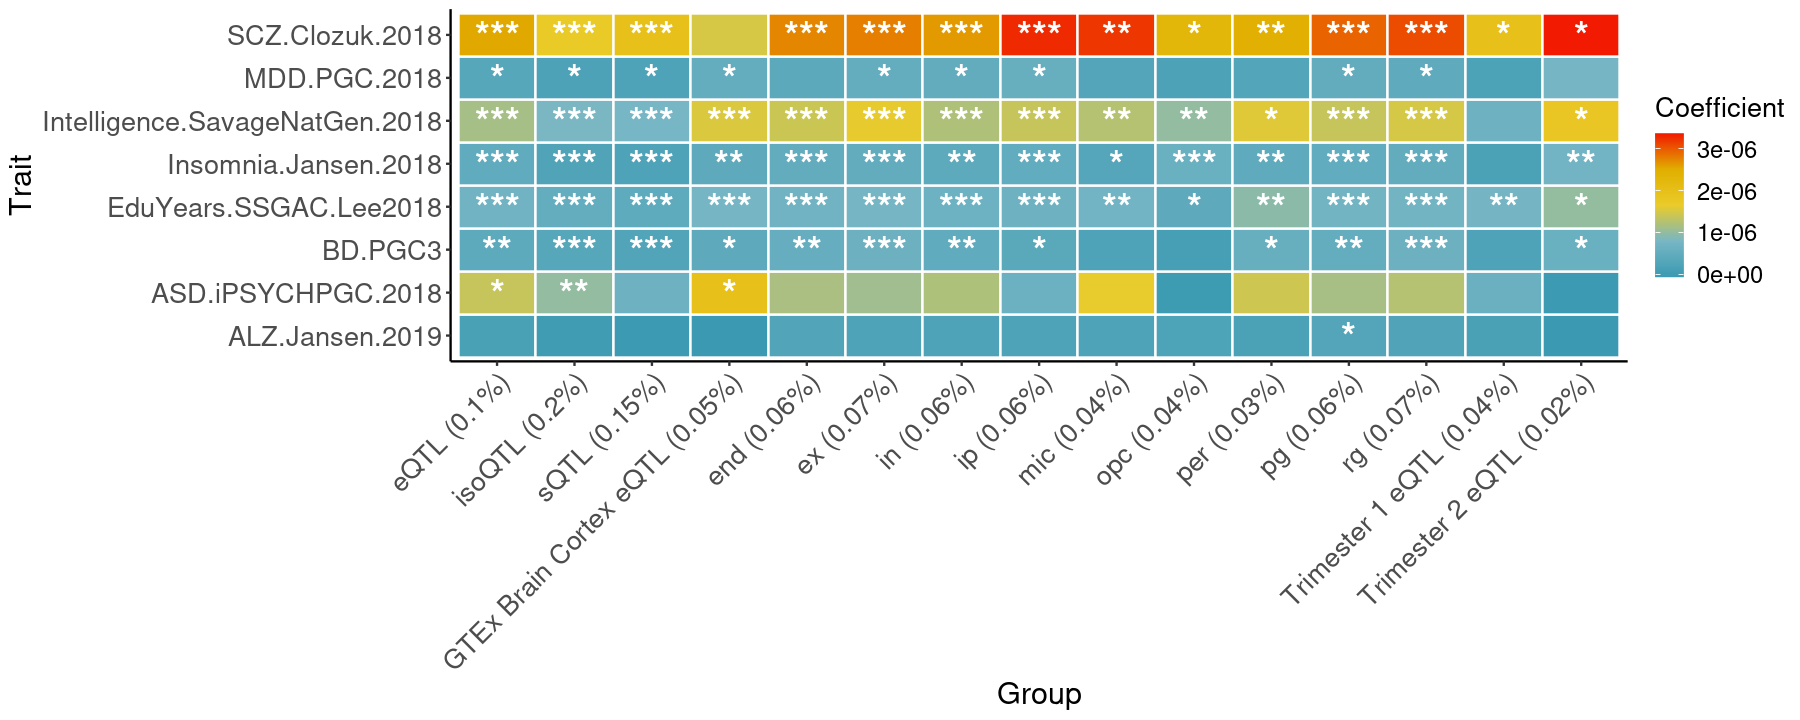

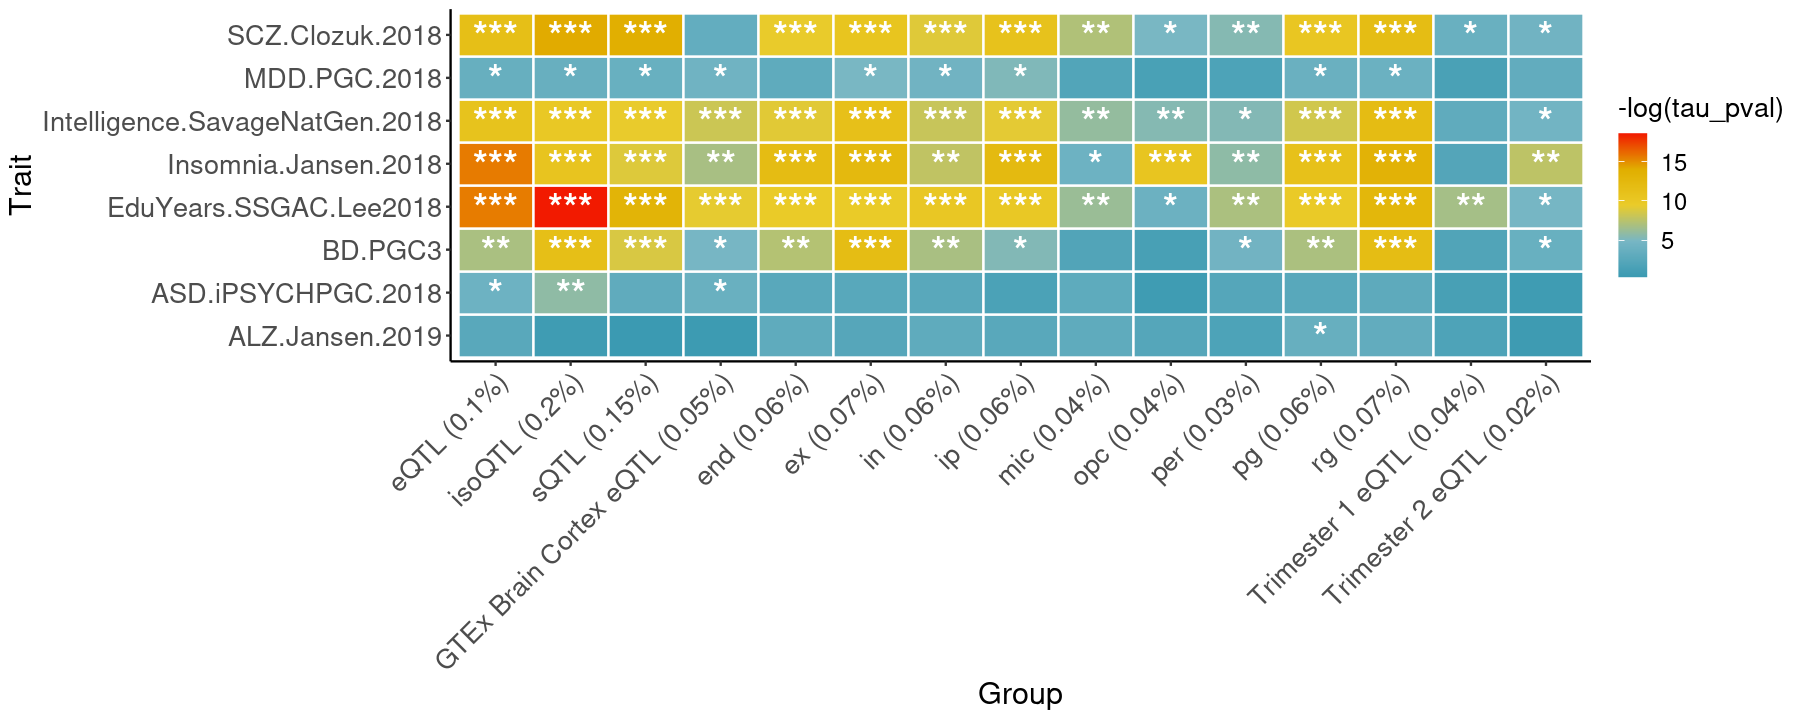

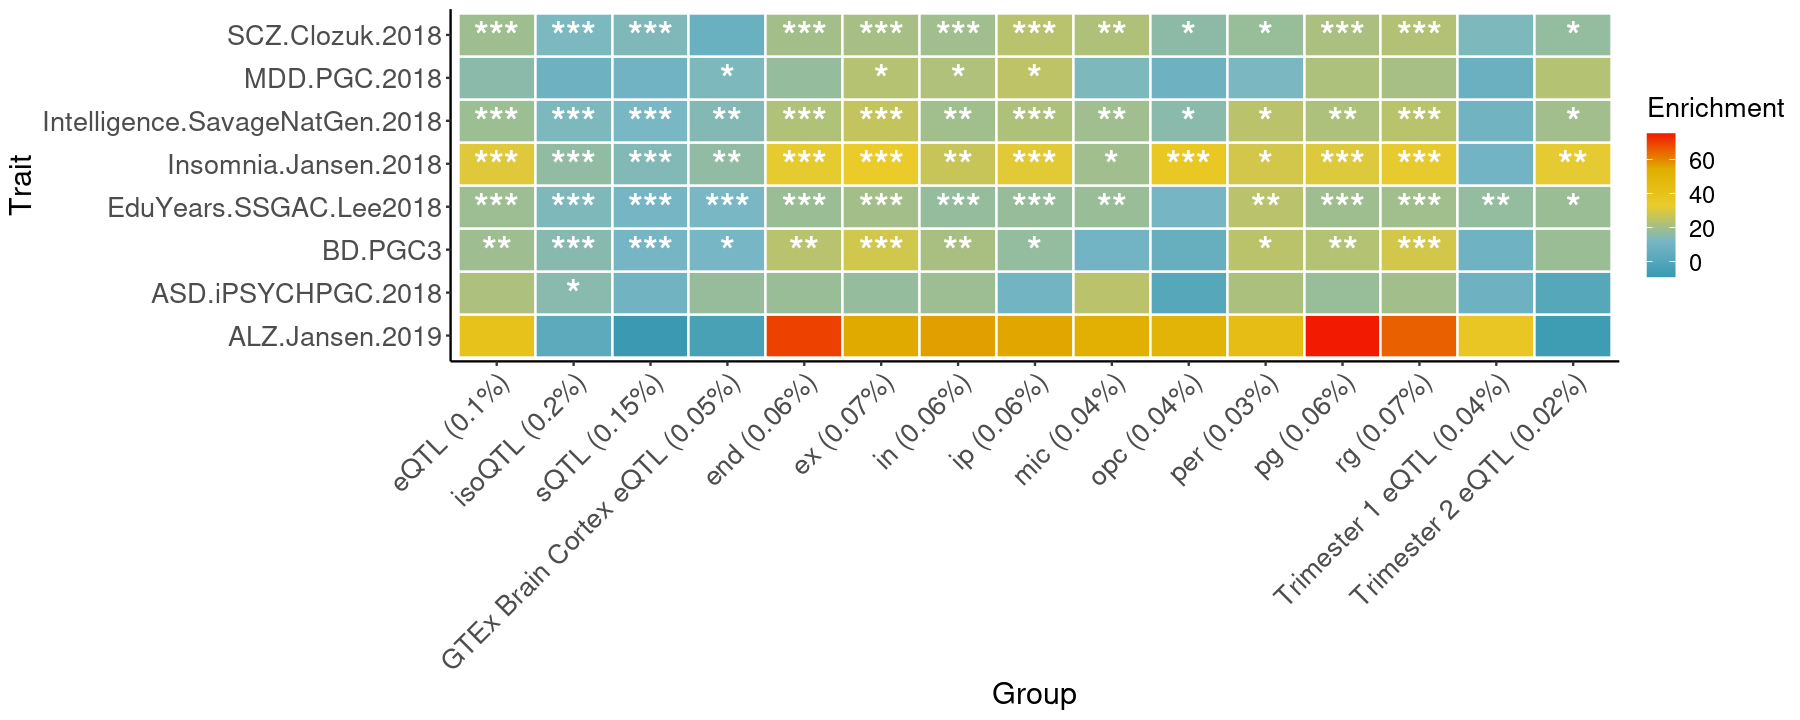

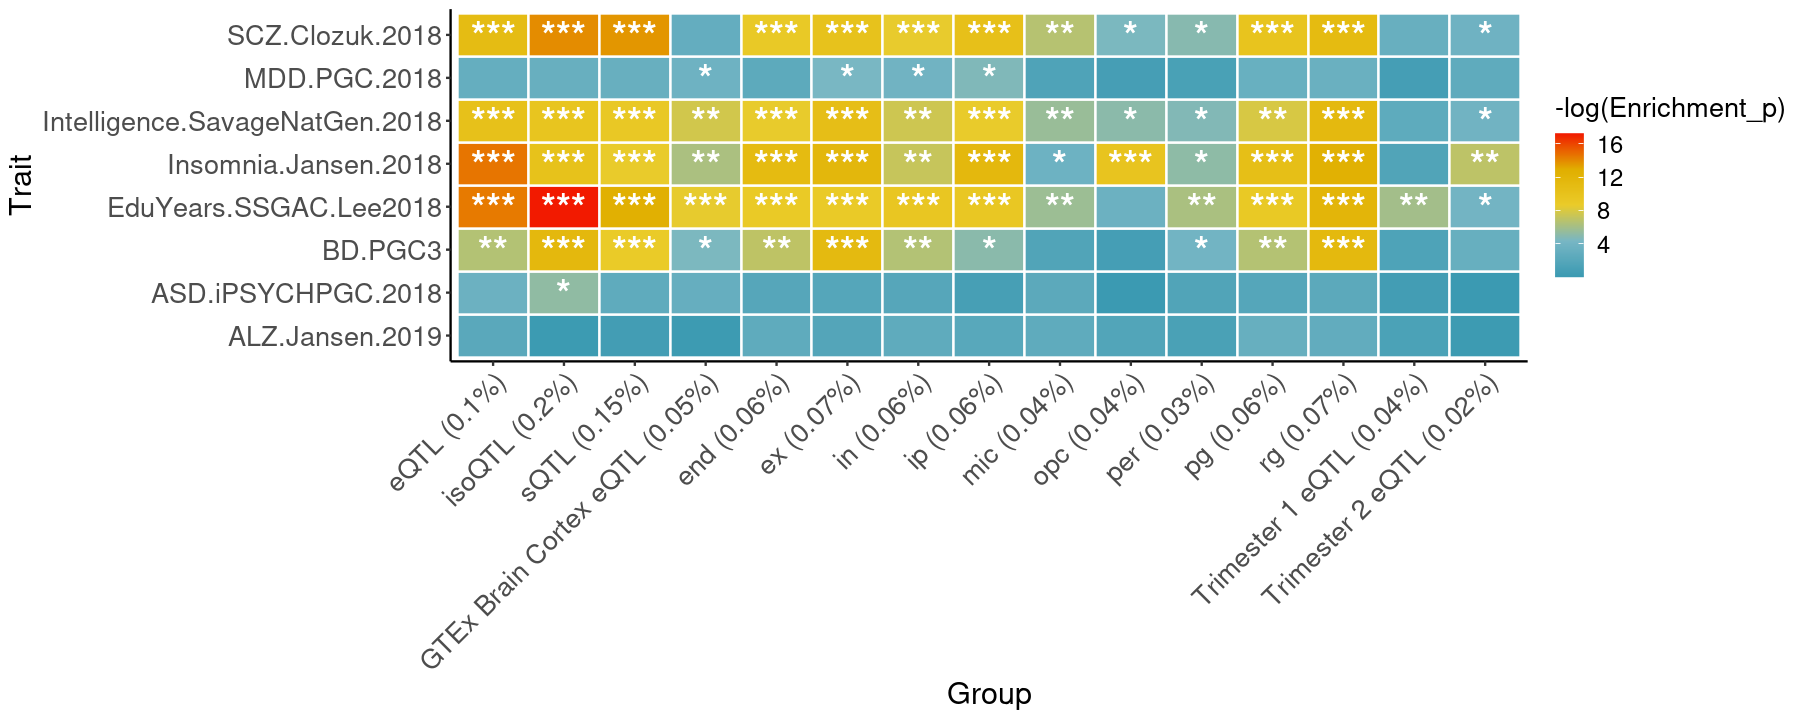

In [32]:
options(repr.plot.width = 15, repr.plot.height = 6)

pal <- wes_palette("Zissou1", 100, type = "continuous")

p <- ggplot(df, aes(x = Group, y = Trait, fill = Coefficient)) +
    geom_tile(colour = "white", size = 0.5) +
#     facet_wrap(~set, scales='free_x') +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
#     scale_fill_gradient(low = "white", high = "blue")
#     scale_fill_gradient2(low = "grey", mid = "white", high = "blue", midpoint = 0)
          scale_fill_gradientn(colours = pal) +
#     geom_vline(xintercept = "sQTL (0.15%)", color = "white", linetype = "dashed", size = 2)
    geom_text(aes(label = tau.signif), color = "white", size = 8, fontface = "bold")
p

p0 <- ggplot(df, aes(x = Group, y = Trait, fill = -log(tau_pval))) +
    geom_tile(colour = "white", size = 0.5) +
#     facet_wrap(~set, scales='free_x') +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
#     scale_fill_gradient(low = "white", high = "blue")
#     scale_fill_gradient2(low = "grey", mid = "white", high = "blue", midpoint = 0)
          scale_fill_gradientn(colours = pal) +
#     geom_vline(xintercept = "sQTL (0.15%)", color = "white", linetype = "dashed", size = 2)
    geom_text(aes(label = tau.signif), color = "white", size = 8, fontface = "bold")
p0

p1 <- ggplot(df, aes(x = Group, y = Trait, fill = Enrichment)) +
    geom_tile(colour = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
#     scale_fill_gradient(low = "white", high = "blue") +
    scale_fill_gradientn(colours = pal) +
    geom_text(aes(label = en.signif), color = "white", size = 8, fontface = "bold")
p1

p2 <- ggplot(df, aes(x = Group, y = Trait, fill = -log(Enrichment_p))) +
    geom_tile(colour = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
#     scale_fill_gradient(low = "white", high = "blue") +
    scale_fill_gradientn(colours = pal) +
    geom_text(aes(label = en.signif), color = "white", size = 8, fontface = "bold")
p2

In [33]:
ggsave("../figures/ldsc_tau.pdf", p, width = 15, height = 6)
ggsave("../figures/ldsc_tau_p.pdf", p0, width = 15, height = 6)
ggsave("../figures/ldsc_enrich.pdf", p1, width = 15, height = 6)
ggsave("../figures/ldsc_enrich_p.pdf", p2, width = 15, height = 6)

In [18]:
df <- rbind(e.df, iso.df, s.df, gtex.df)
df$Group <- factor(df$Group, levels = c("eQTL (0.1%)", "isoQTL (0.2%)", "sQTL (0.15%)",
                                        "GTEx Brain Cortex eQTL (0.05%)"))

In [20]:
df <- df %>% 
    mutate(tau_pval = pnorm(Coefficient_z.score, lower.tail = FALSE)) %>%
    mutate(tau_fdr = p.adjust(tau_pval, method = 'fdr')) %>% 
    mutate(enrich_fdr = p.adjust(Enrichment_p, method = 'fdr'))
#     mutate(tau.signif = ifelse(0.01 < tau_fdr < 0.05, "*", "")) %>%
#     mutate(en.signif = ifelse(enrich_fdr < 0.05, "*", ""))
df$tau.signif <- df$en.signif <- ' '
for (i in 1:nrow(df)) {
    if (df[i,'tau_fdr'] < 0.05 & df[i,'tau_fdr'] > 0.01) {
        df[i,'tau.signif'] <- "*"
    }
    if (df[i,'tau_fdr'] < 0.01 & df[i,'tau_fdr'] > 0.001) {
        df[i,'tau.signif'] <- "**"
    }
    if (df[i,'tau_fdr'] < 0.001) {
        df[i,'tau.signif'] <- "***"
    }
    if (df[i,'enrich_fdr'] < 0.05 & df[i,'enrich_fdr'] > 0.01) {
        df[i,'en.signif'] <- "*"
    }
    if (df[i,'enrich_fdr'] < 0.01 & df[i,'enrich_fdr'] > 0.001) {
        df[i,'en.signif'] <- "**"
    }
    if (df[i,'enrich_fdr'] < 0.001) {
        df[i,'en.signif'] <- "***"
    }
}

In [ ]:
# df <- df %>%
#     mutate(set = ifelse(Group %in% c("eQTL (0.1%)", "isoQTL (0.2%)", "sQTL (0.15%)"), 
#                         "Fetal QTL", "Cell type-specific eQTL")) 
df[df$Group == "GTEx Brain Cortex eQTL (0.05%)", "set"] <- "GTEx eQTL"
df

In [21]:
df

Category,Prop._SNPs,Prop._h2,Prop._h2_std_error,Enrichment,Enrichment_std_error,Enrichment_p,Coefficient,Coefficient_std_error,Coefficient_z.score,Trait,Group,tau_pval,tau_fdr,enrich_fdr,en.signif,tau.signif
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
L2_1,0.0010447675,0.042573906,0.022884826,40.749645,21.904228,1.134385e-01,1.455994e-07,1.013792e-07,1.43618579,ALZ.Jansen.2019,eQTL (0.1%),7.547474e-02,8.328247e-02,1.251735e-01,,
L2_1,0.0010447675,0.022937893,0.010230718,21.955021,9.792339,3.154210e-02,1.375776e-06,6.461857e-07,2.12907282,ASD.iPSYCHPGC.2018,eQTL (0.1%),1.662412e-02,2.418054e-02,4.587942e-02,*,*
L2_1,0.0010447675,0.019979412,0.005917958,19.123309,5.664378,1.428099e-03,4.112628e-07,1.336915e-07,3.07620655,BD.PGC3,eQTL (0.1%),1.048263e-03,1.973201e-03,2.688186e-03,**,**
L2_1,0.0010447675,0.019916563,0.003577345,19.063153,3.424058,5.298244e-07,6.971293e-07,1.366052e-07,5.10323996,EduYears.SSGAC.Lee2018,eQTL (0.1%),1.669436e-07,1.780732e-06,5.651461e-06,***,***
L2_1,0.0010447675,0.032453947,0.006006658,31.063319,5.749277,4.614564e-07,4.612561e-07,9.027065e-08,5.10970143,Insomnia.Jansen.2018,eQTL (0.1%),1.613342e-07,1.780732e-06,5.651461e-06,***,***
L2_1,0.0010447675,0.019728065,0.004456214,18.882732,4.265268,3.666894e-05,1.134333e-06,2.768640e-07,4.09707655,Intelligence.SavageNatGen.2018,eQTL (0.1%),2.092003e-05,7.438232e-05,1.288637e-04,***,***
L2_1,0.0010447675,0.016447489,0.007870563,15.742727,7.533315,4.829813e-02,3.371438e-07,1.762959e-07,1.91237478,MDD.PGC.2018,eQTL (0.1%),2.791407e-02,3.435578e-02,5.944385e-02,,*
L2_1,0.0010447675,0.020226809,0.004347904,19.360105,4.161599,1.815196e-05,2.547143e-06,5.990322e-07,4.25209706,SCZ.Clozuk.2018,eQTL (0.1%),1.058890e-05,4.235561e-05,7.260783e-05,***,***
L2_1,0.0019591359,0.005867850,0.032387180,2.995121,16.531360,9.135757e-01,-5.278839e-09,8.073240e-08,-0.06538687,ALZ.Jansen.2019,isoQTL (0.2%),5.260670e-01,5.611381e-01,9.135757e-01,,


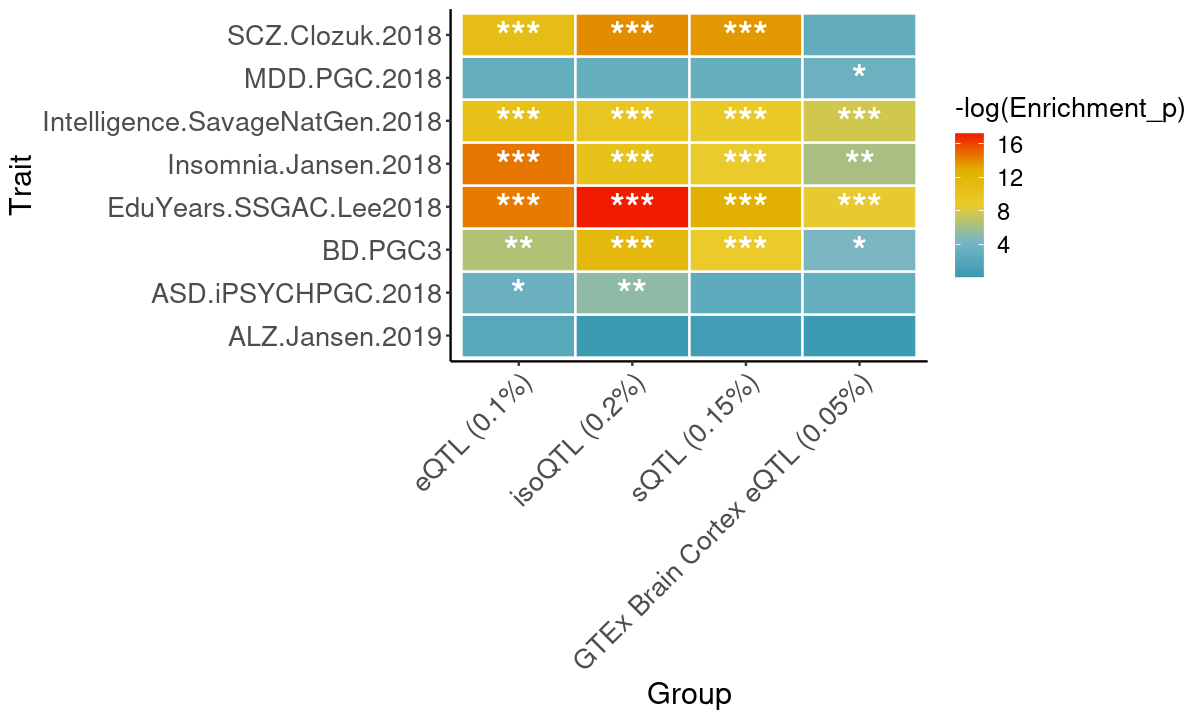

In [25]:
options(repr.plot.width = 10, repr.plot.height = 6)

pal <- wes_palette("Zissou1", 100, type = "continuous")

p2 <- ggplot(df, aes(x = Group, y = Trait, fill = -log(Enrichment_p))) +
    geom_tile(colour = "white", size = 0.5) +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14),
          legend.position = "right") +
#     scale_fill_gradient(low = "white", high = "blue") +
    scale_fill_gradientn(colours = pal) +
    geom_text(aes(label = en.signif), color = "white", size = 8, fontface = "bold")
p2

In [27]:
ggsave("../figures/temp1.pdf", p2, width = 10, height = 6)